In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress
import os


In [3]:
data_file = "Resources/life_expectancy_data.csv" 

In [4]:
life_df = pd.read_csv(data_file)

life_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
#trim the dataframe to the columns that we need
life_df = life_df[["Country", "Year", "Status", "Life expectancy ", "Adult Mortality", "Alcohol", 
                   "percentage expenditure", "Hepatitis B", "Measles ", " BMI ", "Polio", "Total expenditure",
                  "Diphtheria ", " HIV/AIDS", "GDP", "Population", "Schooling"]]

In [6]:
life_df = life_df.rename(columns={'Life expectancy ': 'Life Expectancy', 
                        'percentage expenditure': 'Percentage Expenditure',
                        'Measles ': 'Measles',
                        ' BMI ': 'BMI',
                        "Total expenditure": "Total Expenditure",
                        "Diphtheria ": "Diphtheria",
                        " HIV/AIDS": "HIV/AIDS"
                        })  
life_df.head()

,Country,Year,Status,Life Expectancy,Adult Mortality,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,0.01,71.279624,65.0,1154,19.1,6.0,8.16,65.0,0.1,584.259210,33736494.0,10.1
1,Afghanistan,2014,Developing,59.9,271.0,0.01,73.523582,62.0,492,18.6,58.0,8.18,62.0,0.1,612.696514,327582.0,10.0
2,Afghanistan,2013,Developing,59.9,268.0,0.01,73.219243,64.0,430,18.1,62.0,8.13,64.0,0.1,631.744976,31731688.0,9.9
3,Afghanistan,2012,Developing,59.5,272.0,0.01,78.184215,67.0,2787,17.6,67.0,8.52,67.0,0.1,669.959000,3696958.0,9.8
4,Afghanistan,2011,Developing,59.2,275.0,0.01,7.097109,68.0,3013,17.2,68.0,7.87,68.0,0.1,63.537231,2978599.0,9.5


In [23]:
year_2015 = life_df.groupby('Country')['Year'].max()
year_2015 = year_2015.reset_index()

df_2015 = year_2015.merge(life_df, how='left', on=['Country', 'Year'])
df_2015

,Country,Year,Status,Life Expectancy,Adult Mortality,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,0.01,71.279624,65.0,1154,19.1,6.0,8.16,65.0,0.1,584.259210,33736494.0,10.1
1,Albania,2015,Developing,77.8,74.0,4.60,364.975229,99.0,0,58.0,99.0,6.00,99.0,0.1,3954.227830,28873.0,14.2
2,Algeria,2015,Developing,75.6,19.0,NaN,0.000000,95.0,63,59.5,95.0,NaN,95.0,0.1,4132.762920,39871528.0,14.4
3,Angola,2015,Developing,52.4,335.0,NaN,0.000000,64.0,118,23.3,7.0,NaN,64.0,1.9,3695.793748,2785935.0,11.4
4,Antigua and Barbuda,2015,Developing,76.4,13.0,NaN,0.000000,99.0,0,47.7,86.0,NaN,99.0,0.2,13566.954100,NaN,13.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Venezuela (Bolivarian Republic of),2015,Developing,74.1,157.0,NaN,0.000000,87.0,0,62.1,87.0,NaN,87.0,0.1,NaN,NaN,14.3
189,Viet Nam,2015,Developing,76.0,127.0,NaN,0.000000,97.0,256,17.5,97.0,NaN,97.0,0.1,NaN,NaN,12.6
190,Yemen,2015,Developing,65.7,224.0,NaN,0.000000,69.0,468,41.3,63.0,NaN,69.0,0.1,NaN,NaN,9.0
191,Zambia,2015,Developing,61.8,33.0,NaN,0.000000,9.0,9,23.4,9.0,NaN,9.0,4.1,1313.889646,161587.0,12.5


In [24]:
year_2000 = life_df.groupby('Country')['Year'].min()
year_2000 = year_2000.reset_index()

df_2000 = year_2000.merge(life_df, how='left', on=['Country', 'Year'])
df_2000

,Country,Year,Status,Life Expectancy,Adult Mortality,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Schooling
0,Afghanistan,2000,Developing,54.8,321.0,0.01,10.424960,62.0,6532,12.2,24.0,8.20,24.0,0.1,114.560000,293756.0,5.5
1,Albania,2000,Developing,72.6,11.0,3.66,91.711541,96.0,662,45.0,97.0,6.26,97.0,0.1,1175.788981,38927.0,10.7
2,Algeria,2000,Developing,71.3,145.0,0.25,154.455944,NaN,0,44.4,86.0,3.49,86.0,0.1,1757.177970,3118366.0,10.7
3,Angola,2000,Developing,45.3,48.0,1.85,15.881493,NaN,2219,15.4,3.0,2.79,28.0,2.0,555.296942,1644924.0,4.6
4,Antigua and Barbuda,2000,Developing,73.6,156.0,7.27,1127.743470,NaN,0,38.2,96.0,4.13,95.0,0.1,9875.161736,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Venezuela (Bolivarian Republic of),2000,Developing,72.5,168.0,8.01,0.000000,5.0,22,53.4,86.0,4.91,77.0,0.1,NaN,NaN,10.6
189,Viet Nam,2000,Developing,73.4,139.0,1.60,0.000000,NaN,16512,9.2,96.0,4.89,96.0,0.1,NaN,NaN,10.4
190,Yemen,2000,Developing,68.0,252.0,0.07,0.000000,14.0,0,31.2,74.0,4.14,74.0,0.1,NaN,NaN,7.7
191,Zambia,2000,Developing,43.8,614.0,2.62,45.616880,NaN,30930,16.8,85.0,7.16,85.0,18.7,341.955625,1531221.0,9.6


In [27]:
#Diphtheria immunization coverage among 1 year-olds (%)) compared to life expectancy (years)
avg_life_2000 = df_2000.loc(df_2000["Life Expectancy"].mean())
avg_life_2000

ValueError: No axis named 66.75027322404374 for object type DataFrame

In [32]:
dev_df = life_df.loc[life_df["Status"] == "Developed"]
dev_df.head()

,Country,Year,Status,Life Expectancy,Adult Mortality,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Schooling
112,Australia,2015,Developed,82.8,59.0,NaN,0.00000,93.0,74,66.6,93.0,NaN,93.0,0.1,56554.38760,23789338.0,20.4
113,Australia,2014,Developed,82.7,6.0,9.71,10769.36305,91.0,340,66.1,92.0,9.42,92.0,0.1,62214.69120,2346694.0,20.4
114,Australia,2013,Developed,82.5,61.0,9.87,11734.85381,91.0,158,65.5,91.0,9.36,91.0,0.1,67792.33860,23117353.0,20.3
115,Australia,2012,Developed,82.3,61.0,10.03,11714.99858,91.0,199,65.0,92.0,9.36,92.0,0.1,67677.63477,22728254.0,20.1
116,Australia,2011,Developed,82.0,63.0,10.30,10986.26527,92.0,190,64.4,92.0,9.20,92.0,0.1,62245.12900,223424.0,19.8


In [33]:
undev_df = life_df.loc[life_df["Status"] == "Developing"]
undev_df.head()

,Country,Year,Status,Life Expectancy,Adult Mortality,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,0.01,71.279624,65.0,1154,19.1,6.0,8.16,65.0,0.1,584.259210,33736494.0,10.1
1,Afghanistan,2014,Developing,59.9,271.0,0.01,73.523582,62.0,492,18.6,58.0,8.18,62.0,0.1,612.696514,327582.0,10.0
2,Afghanistan,2013,Developing,59.9,268.0,0.01,73.219243,64.0,430,18.1,62.0,8.13,64.0,0.1,631.744976,31731688.0,9.9
3,Afghanistan,2012,Developing,59.5,272.0,0.01,78.184215,67.0,2787,17.6,67.0,8.52,67.0,0.1,669.959000,3696958.0,9.8
4,Afghanistan,2011,Developing,59.2,275.0,0.01,7.097109,68.0,3013,17.2,68.0,7.87,68.0,0.1,63.537231,2978599.0,9.5


In [34]:
immune_df = undev_df[["Country", "Year", "Status", "Life Expectancy", "Diphtheria", "Hepatitis B", "Polio"]]
immune_df.dropna()


,Country,Year,Status,Life Expectancy,Diphtheria,Hepatitis B,Polio
0,Afghanistan,2015,Developing,65.0,65.0,65.0,6.0
1,Afghanistan,2014,Developing,59.9,62.0,62.0,58.0
2,Afghanistan,2013,Developing,59.9,64.0,64.0,62.0
3,Afghanistan,2012,Developing,59.5,67.0,67.0,67.0
4,Afghanistan,2011,Developing,59.2,68.0,68.0,68.0
...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,65.0,68.0,67.0
2934,Zimbabwe,2003,Developing,44.5,68.0,7.0,7.0
2935,Zimbabwe,2002,Developing,44.8,71.0,73.0,73.0
2936,Zimbabwe,2001,Developing,45.3,75.0,76.0,76.0


In [35]:
immune_df = immune_df.loc[immune_df["Schooling"] != 0]
immune_df = immune_df.dropna()

Text(15, 40, 'y = 0.08*x + 62.08')

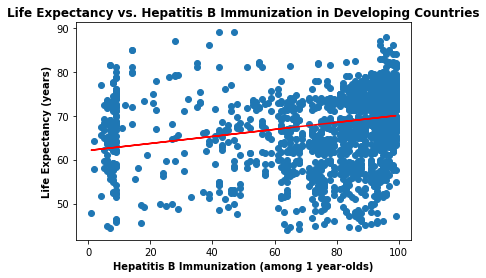

In [39]:
#plot life expectancy vs. schooling
plt.scatter(immune_df["Hepatitis B"], immune_df["Life Expectancy"])
plt.title("Life Expectancy vs. Hepatitis B Immunization in Developing Countries", fontweight="bold")
plt.xlabel("Hepatitis B Immunization (among 1 year-olds)", fontweight="bold")
plt.ylabel("Life Expectancy (years)", fontweight="bold")

#perform regression on life expectancy vs. schooling
(slope, intercept, rvalue, pvalue, stderr) = linregress(immune_df["Hepatitis B"], immune_df["Life Expectancy"])
slope = round(slope, 2)
intercept = round(intercept, 2)
regress_values = (immune_df["Hepatitis B"]*slope) + intercept
plt.plot(immune_df["Hepatitis B"], regress_values, "r-")
line_eq = f"y = {slope}*x + {intercept}"
plt.annotate(line_eq, (15, 40))

Text(15, 40, 'y = 0.12*x + 58.2')

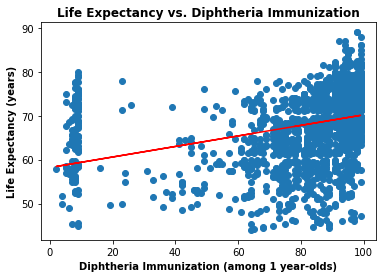

In [38]:
immune_df = immune_df.loc[immune_df["Diphtheria"] != 0]
immune_df = immune_df.dropna()

#plot life expectancy vs. schooling
plt.scatter(immune_df["Diphtheria"], immune_df["Life Expectancy"])
plt.title("Life Expectancy vs. Diphtheria Immunization", fontweight="bold")
plt.xlabel("Diphtheria Immunization (among 1 year-olds)", fontweight="bold")
plt.ylabel("Life Expectancy (years)", fontweight="bold")

#perform regression on life expectancy vs. schooling
(slope, intercept, rvalue, pvalue, stderr) = linregress(immune_df["Diphtheria"], immune_df["Life Expectancy"])
slope = round(slope, 2)
intercept = round(intercept, 2)
regress_values = (immune_df["Diphtheria"]*slope) + intercept
plt.plot(immune_df["Diphtheria"], regress_values, "r-")
line_eq = f"y = {slope}*x + {intercept}"
plt.annotate(line_eq, (15, 40))

In [21]:
dev_mortality_summary = dev_df.groupby("Country").agg({'Adult Mortality':["mean"]})
dev_mortality_summary.head()

,Adult Mortality
,mean
Country,
Australia,63.1875
Austria,65.7500
Belgium,70.1875
Bulgaria,125.5000
Croatia,89.0000


In [21]:
undev_mortality_summary = undev_df.groupby("Country").agg({'Adult Mortality':["mean","median", "var", "std", "sem"]})
undev_mortality_summary.head()

Adult Mortality                                   \
                               mean median           var         std   
Country                                                                
Afghanistan                269.0625  284.0   5294.062500   72.760309   
Albania                     45.0625   17.5   1538.062500   39.218140   
Algeria                    108.1875  124.5   2286.162500   47.813832   
Angola                     328.5625  367.0  12398.929167  111.350479   
Antigua and Barbuda        127.5000  143.0   2040.533333   45.172263   

                                
                           sem  
Country                         
Afghanistan          18.190077  
Albania               9.804535  
Algeria              11.953458  
Angola               27.837620  
Antigua and Barbuda  11.293066

In [22]:
undev_mortality_summary = undev_df.groupby("Country").agg({'Alcohol':["mean"]})
undev_mortality_summary.head()

,Alcohol
,mean
Country,
Afghanistan,0.014375
Albania,4.848750
Algeria,0.406667
Angola,5.740667
Antigua and Barbuda,7.949333
